In [1]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import imdb
from keras.preprocessing import sequence
from keras.layers import Dense, SimpleRNN, Embedding
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
max_features = 10000
maxlen = 500
batch_size = 32

# Loading the Data
(input_train, y_train), (input_test, y_test) = imdb.load_data(num_words=max_features)

print(len(input_train), 'train sequences')
print(len(input_test), 'test sequences')

input_train = sequence.pad_sequences(input_train, maxlen=maxlen)
input_test = sequence.pad_sequences(input_test, maxlen=maxlen)

print('input_train shape:', input_train.shape)
print('input_test shape:', input_test.shape)

25000 train sequences
25000 test sequences
input_train shape: (25000, 500)
input_test shape: (25000, 500)


In [3]:
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 32)                2080      
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 33        
Total params: 322,113
Trainable params: 322,113
Non-trainable params: 0
_________________________________________________________________


In [4]:
model.compile(optimizer='rmsprop', 
              loss='binary_crossentropy', 
              metrics=['acc'])

history = model.fit(input_train, y_train,
                    epochs=10,
                    batch_size=128,
                    validation_split=0.2)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 18s 895us/step - loss: 0.6134 - acc: 0.6533 - val_loss: 0.5564 - val_acc: 0.7290
Epoch 2/10
20000/20000 [==============================] - 17s 872us/step - loss: 0.3988 - acc: 0.8349 - val_loss: 0.3707 - val_acc: 0.8454
Epoch 3/10
20000/20000 [==============================] - 17s 867us/step - loss: 0.2940 - acc: 0.8829 - val_loss: 0.3736 - val_acc: 0.8394
Epoch 4/10
20000/20000 [==============================] - 17s 866us/step - loss: 0.2272 - acc: 0.9137 - val_loss: 0.4345 - val_acc: 0.8080
Epoch 5/10
20000/20000 [==============================] - 17s 869us/step - loss: 0.1662 - acc: 0.9400 - val_loss: 0.4081 - val_acc: 0.8444
Epoch 6/10
20000/20000 [==============================] - 17s 851us/step - loss: 0.1216 - acc: 0.9573 - val_loss: 0.4300 - val_acc: 0.8344
Epoch 7/10
20000/20000

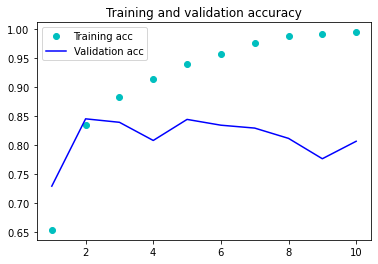

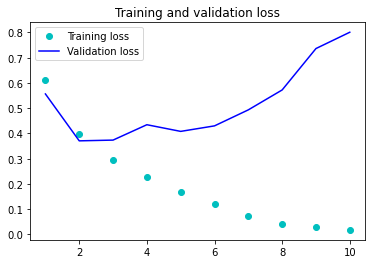

In [5]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'co', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'co', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()
